![Futuristic electric car charging](ev_charging.png)

The US Government's Alternative Fuels Data Center collects records of electric vehicle (EV) charging infrastructure, including charging ports and station locations, as well as sales of electric vehicles. With the EV market rapidly evolving, understanding trends in charging facilities and sales is essential to inform strategic planning.

As a data scientist working for a leading EV charging network operator, you recognize the potential in this data and start wrangling and visualizing the aggregated yearly data. 

This yearly data captured in December of each year encompasses a record of EV charging port installations and station localities spanning roughly ten years, capturing both public and private charging environments. 
___

### The Data
&nbsp;

`private_ev_charging.csv`

| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `year` |  Year of data collection |
| `private_ports`| The number of available charging ports owned by private companies in a given year  |
| `private_station_locations`   | The number of privately owned station locations for EV charging

___

`public_ev_charging.csv`
 
| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `year` |  Year of data collection  |
| `public_ports`| The number of available charging ports under public ownership in a given year  |
| `public_station_locations`   | The number of publicly owned station locations for EV charging

___

The sales information is available for each model and year in the `ev_sales.csv` file:

| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `Vehicle` |  Electric vehicle model |
| `year`| Year of data collection |
| `sales`   | The number of vehicles sold in the US

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets

In [32]:
private_ev_charging = pd.read_csv("private_ev_charging.csv")
public_ev_charging = pd.read_csv("public_ev_charging.csv")
ev_sales = pd.read_csv("ev_sales.csv")
print('Read successfully')

Read successfully


# Perform an anti-join to keep only the rows with complete information

In [33]:
df_combined = private_ev_charging.merge(public_ev_charging, on='year', how='outer', indicator=True)
df_temp = df_combined[df_combined['_merge'] == 'both']

# Drop the _merge column as it's no longer needed

In [34]:
df_temp = df_temp.drop(columns=['_merge'])
df_temp

,year,private_ports,private_station_locations,public_ports,public_station_locations
0,2014,3695.0,1825.0,22470,9207
1,2015,4150.0,1962.0,26532,10710
2,2016,5763.0,2331.0,33165,13150
3,2017,6048.0,2370.0,45789,16170
4,2018,6812.0,2489.0,56842,19893
5,2019,9955.0,3078.0,73838,23282
6,2020,10647.0,2768.0,96190,28602
7,2021,18867.0,4074.0,114451,46407
8,2022,19993.0,4435.0,136513,53764


# Get total sales grouping by each year

In [35]:
ev_total_sales = ev_sales.groupby('year')['sales'].sum().reset_index()
print(ev_total_sales)
ev_sales_2018 = ev_sales.loc[ev_sales['year'] == 2018, 'sales'].sum()
print("Total EV sales in 2018:", ev_sales_2018)

   year     sales
0  2011   17763.0
1  2012   53171.0
2  2013   97102.0
3  2014  118882.0
4  2015  114023.0
5  2016  159616.0
6  2017  195581.0
7  2018  361315.0
8  2019  326644.0
Total EV sales in 2018: 361315.0


# Left-join with sales

In [36]:
df_complete = df_temp.merge(ev_total_sales, how='left', on='year')
df_complete.head(5)

,year,private_ports,private_station_locations,public_ports,public_station_locations,sales
0,2014,3695.0,1825.0,22470,9207,118882.0
1,2015,4150.0,1962.0,26532,10710,114023.0
2,2016,5763.0,2331.0,33165,13150,159616.0
3,2017,6048.0,2370.0,45789,16170,195581.0
4,2018,6812.0,2489.0,56842,19893,361315.0


# Drop any rows with null values

In [37]:
df_complete = df_complete.dropna(subset="sales")
df_complete.head(5)

,year,private_ports,private_station_locations,public_ports,public_station_locations,sales
0,2014,3695.0,1825.0,22470,9207,118882.0
1,2015,4150.0,1962.0,26532,10710,114023.0
2,2016,5763.0,2331.0,33165,13150,159616.0
3,2017,6048.0,2370.0,45789,16170,195581.0
4,2018,6812.0,2489.0,56842,19893,361315.0


# Create a figure and axis object

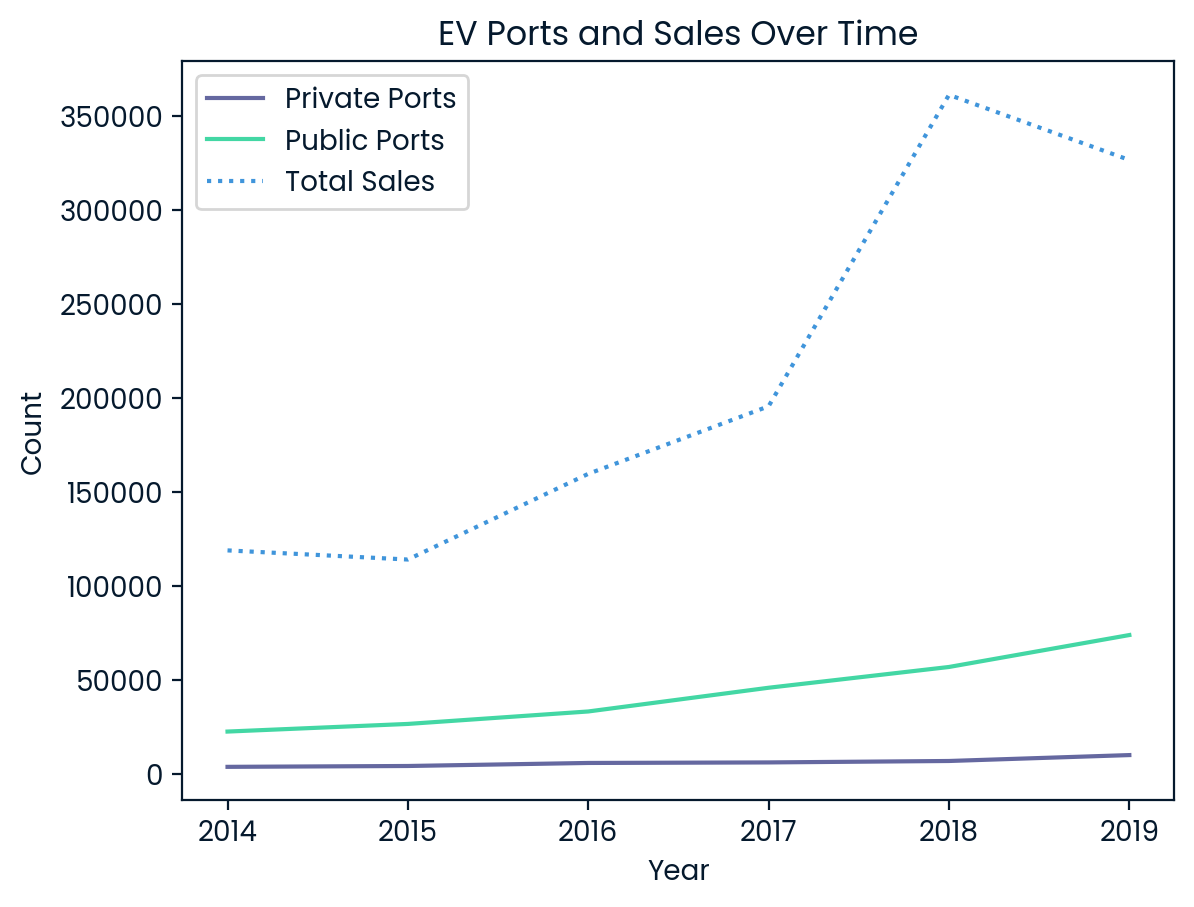

In [38]:
fig, ax = plt.subplots()

sns.lineplot(data=df_complete, x='year', y='private_ports', label='Private Ports')
sns.lineplot(data=df_complete, x='year', y='public_ports', label='Public Ports')
sns.lineplot(data=df_complete, x='year', y='sales', label='Total Sales', linestyle=':')
ax.set_title('EV Ports and Sales Over Time')
ax.set(xlabel='Year', ylabel='Count')
ax.legend(loc='upper left')

# Show the plot
plt.show()
trend = "same"

## Dual-axis: Total Ports vs Total EV Sales (per Year)

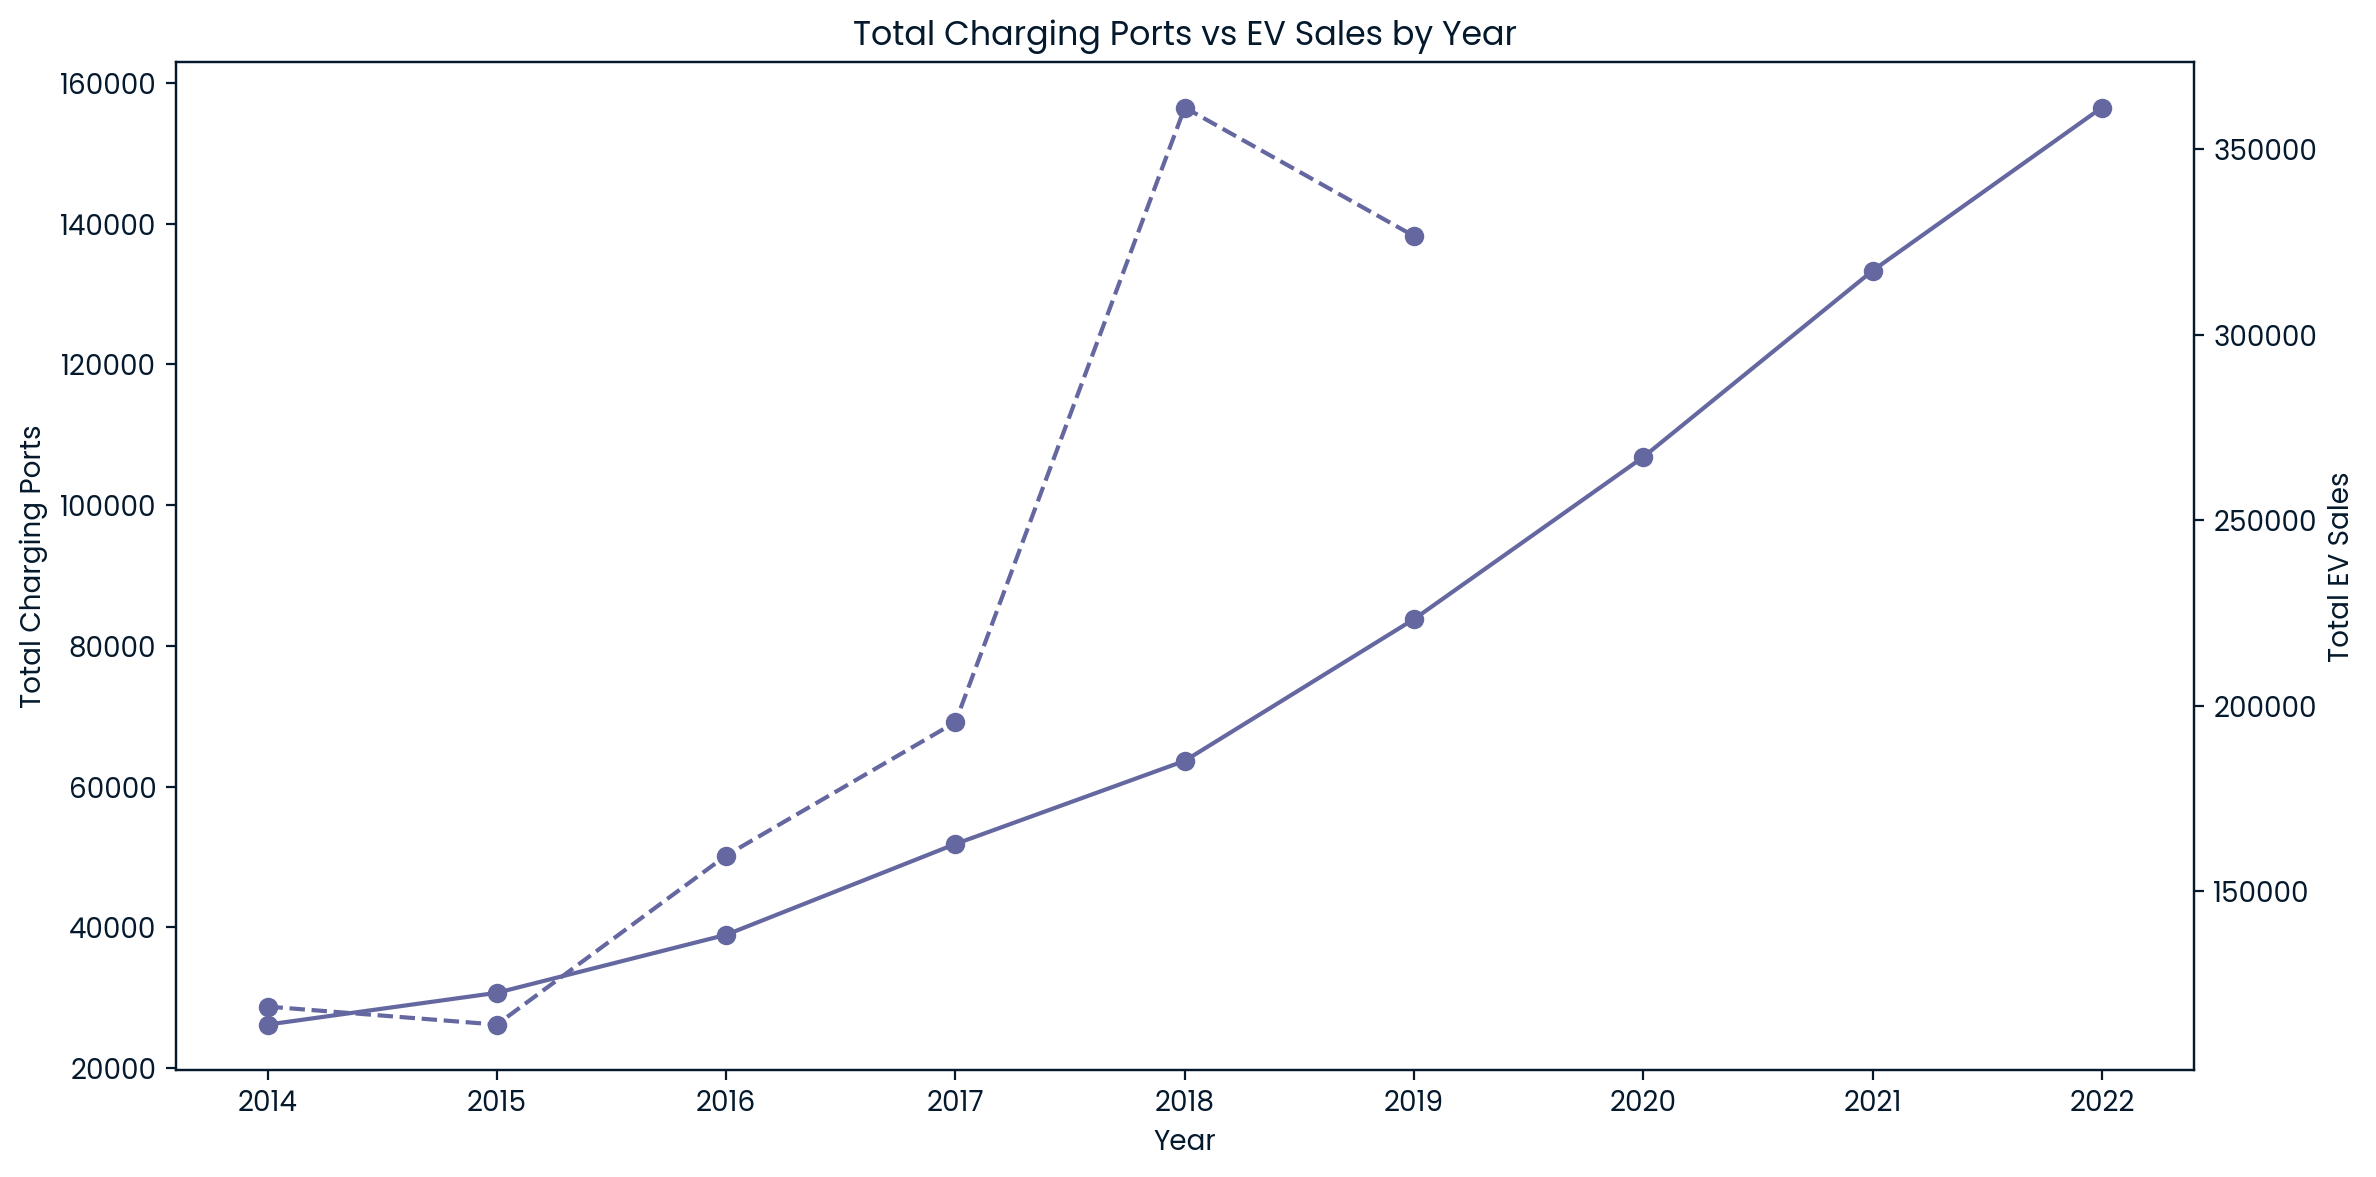

In [26]:
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(final_df["year"], final_df["total_ports"], marker="o")
ax1.set_xlabel("Year")
ax1.set_ylabel("Total Charging Ports")

ax2 = ax1.twinx()
ax2.plot(final_df["year"], final_df["sales"], marker="o", linestyle="--")
ax2.set_ylabel("Total EV Sales")

plt.title("Total Charging Ports vs EV Sales by Year")
plt.grid(axis="x")
plt.tight_layout()
plt.savefig("figures_ev/ports_vs_sales_dual_axis.png", dpi=200)
plt.show()

## Stacked bars: Public vs Private Ports share over time

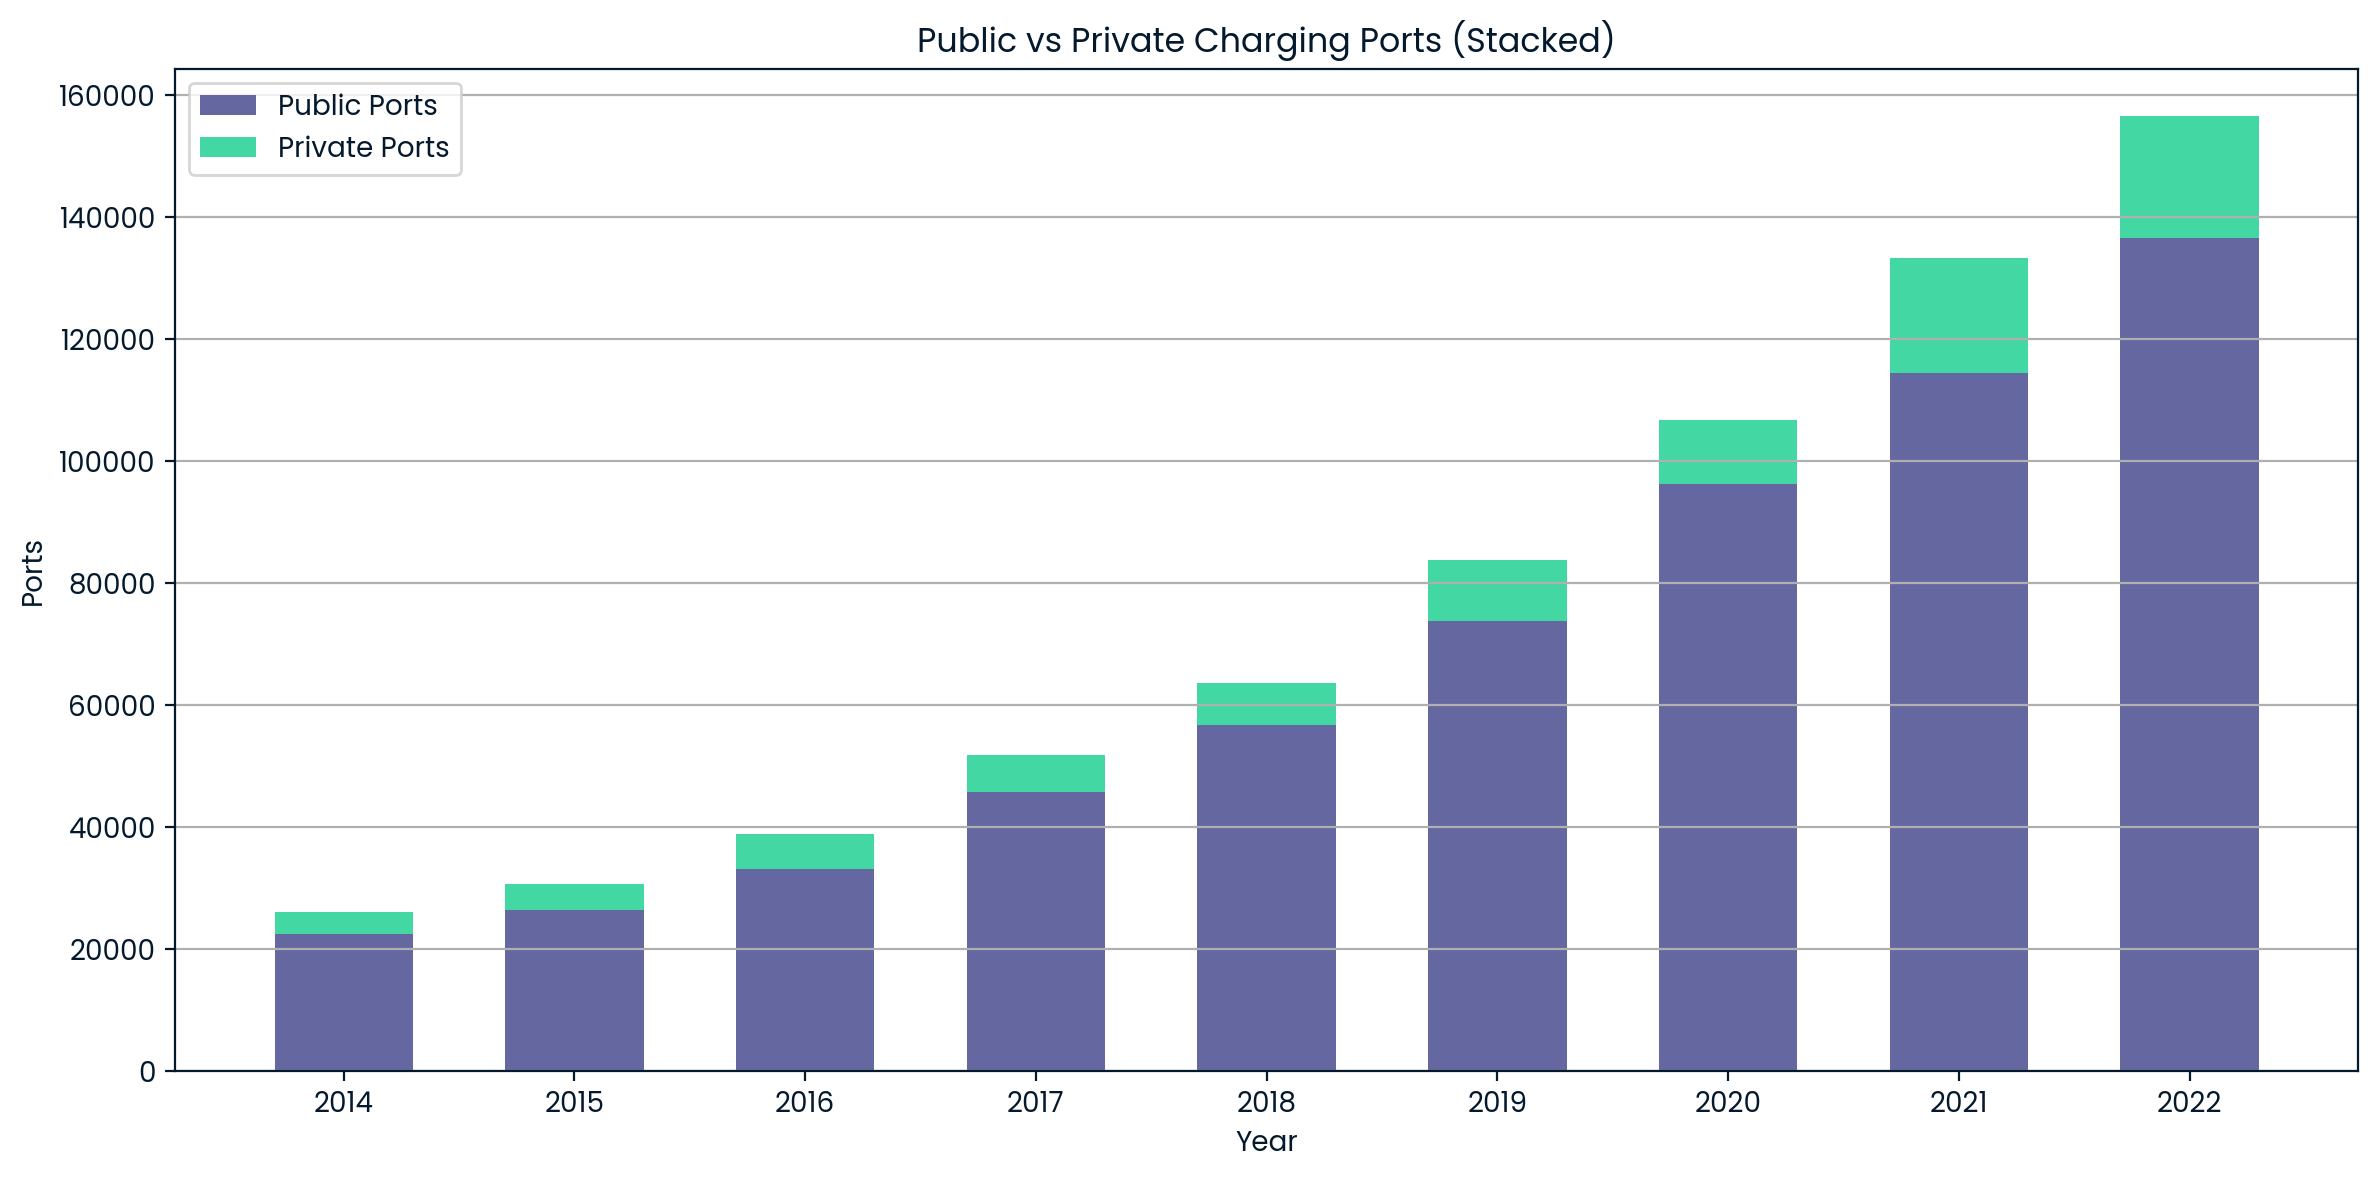

In [27]:
x = np.arange(len(final_df))
width = 0.6
plt.figure(figsize=(12, 6))
plt.bar(x, final_df["public_ports"].values, width, label="Public Ports")
plt.bar(x, final_df["private_ports"].values, width, bottom=final_df["public_ports"].values, label="Private Ports")
plt.xticks(x, final_df["year"].astype(int))
plt.legend()
_finalize("Public vs Private Charging Ports (Stacked)", "Year", "Ports",
          save_as="figures_ev/ports_public_vs_private_stacked.png")

## Lines: Station Locations (Public vs Private)

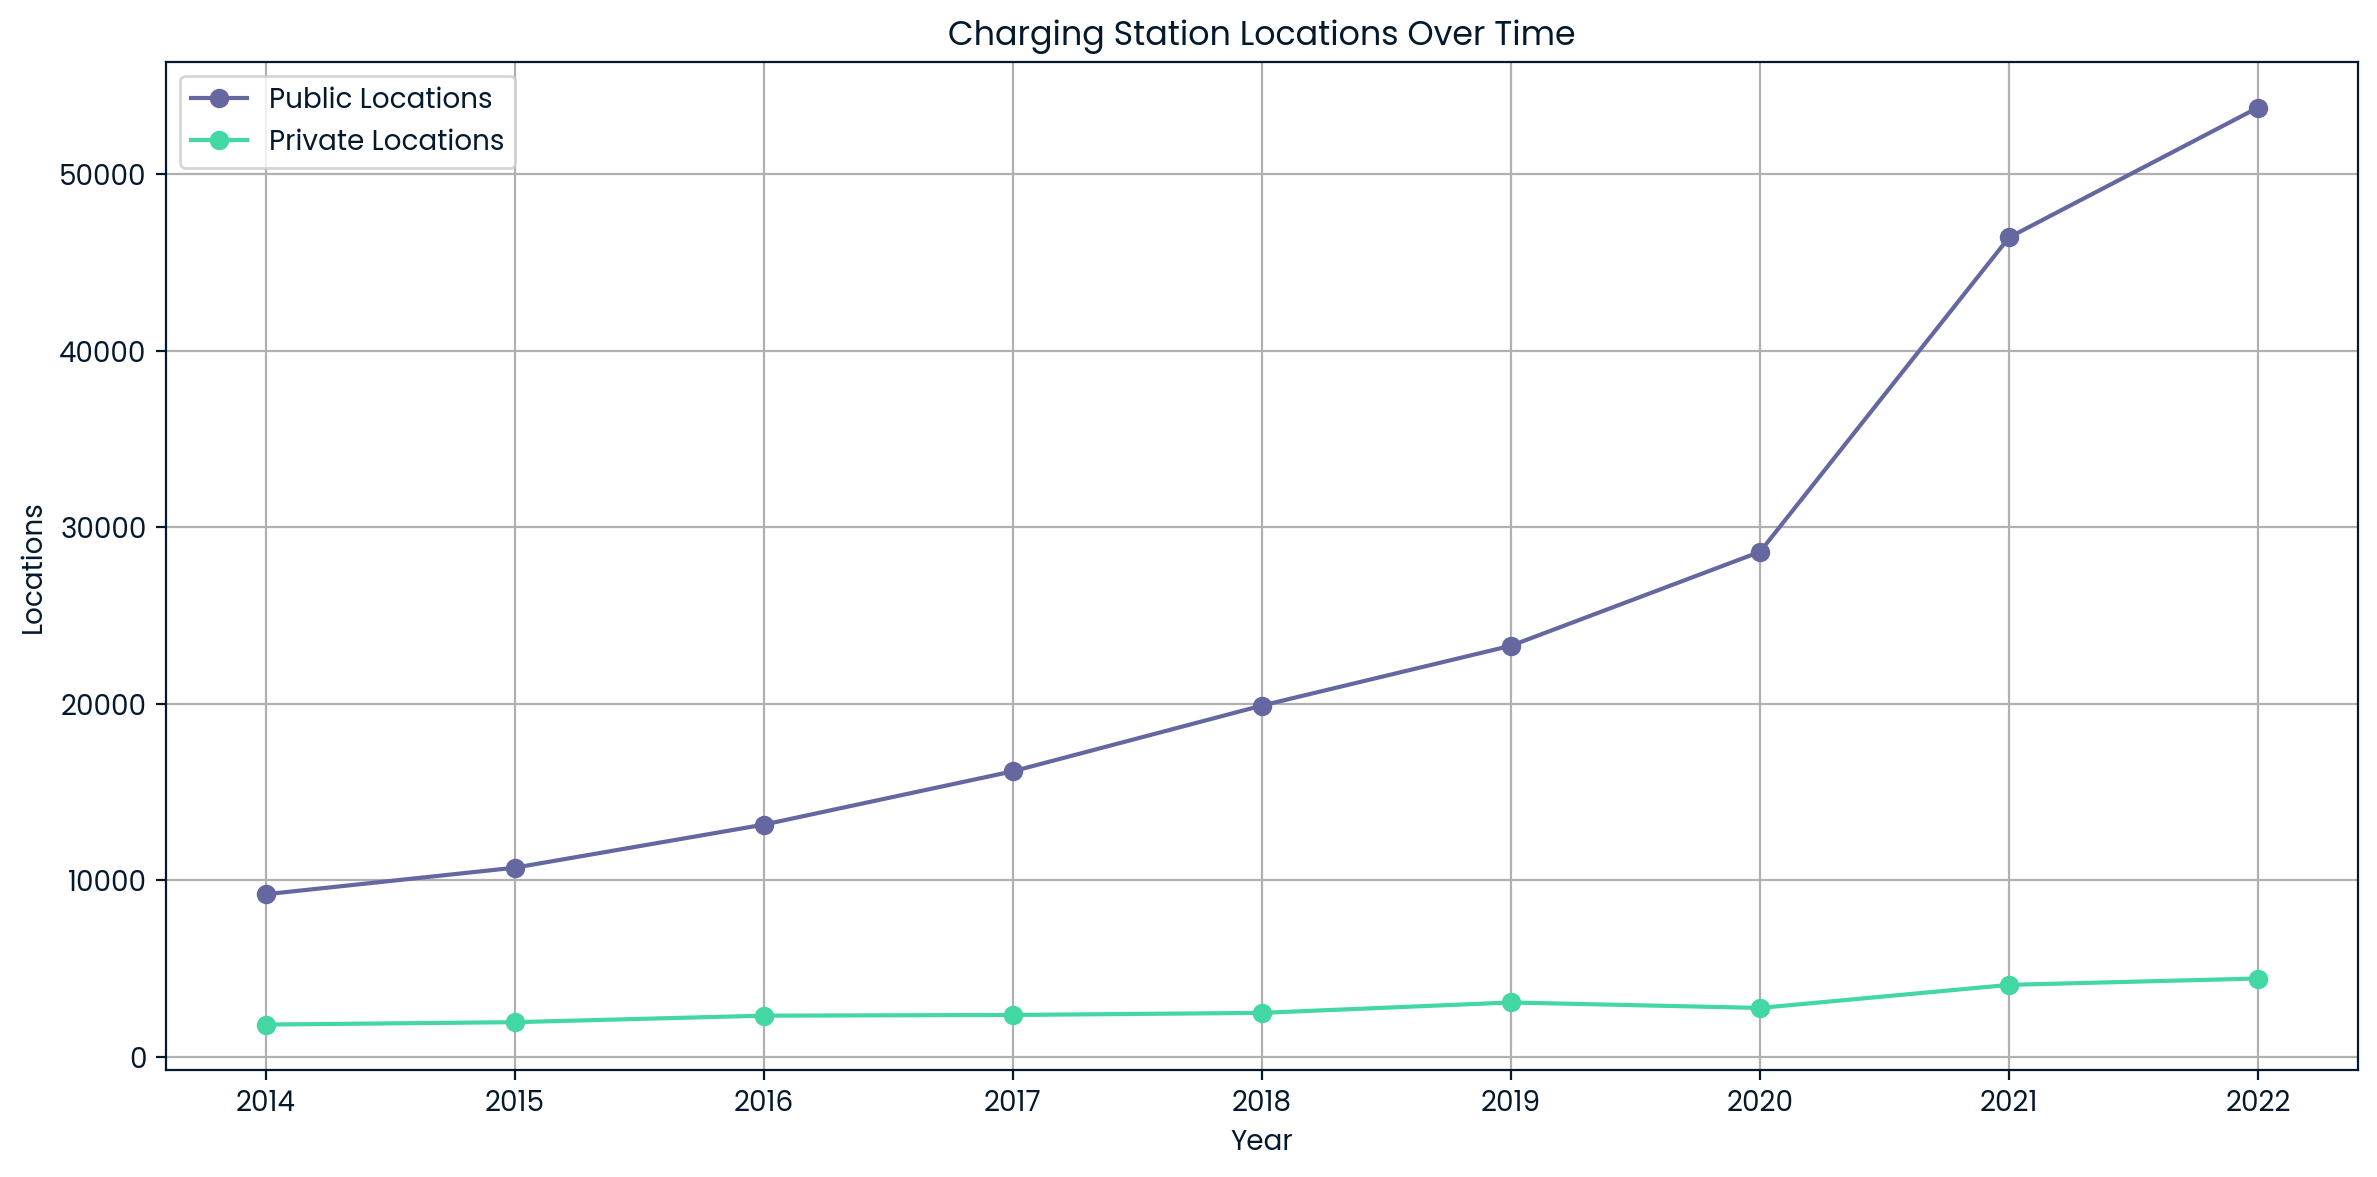

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(final_df["year"], final_df["public_station_locations"], marker="o", label="Public Locations")
plt.plot(final_df["year"], final_df["private_station_locations"], marker="o", label="Private Locations")
plt.legend()
_finalize("Charging Station Locations Over Time", "Year", "Locations",
          save_as="figures_ev/station_locations_over_time.png", grid="both")

## Scatter: EV Sales vs Total Ports (relationship)

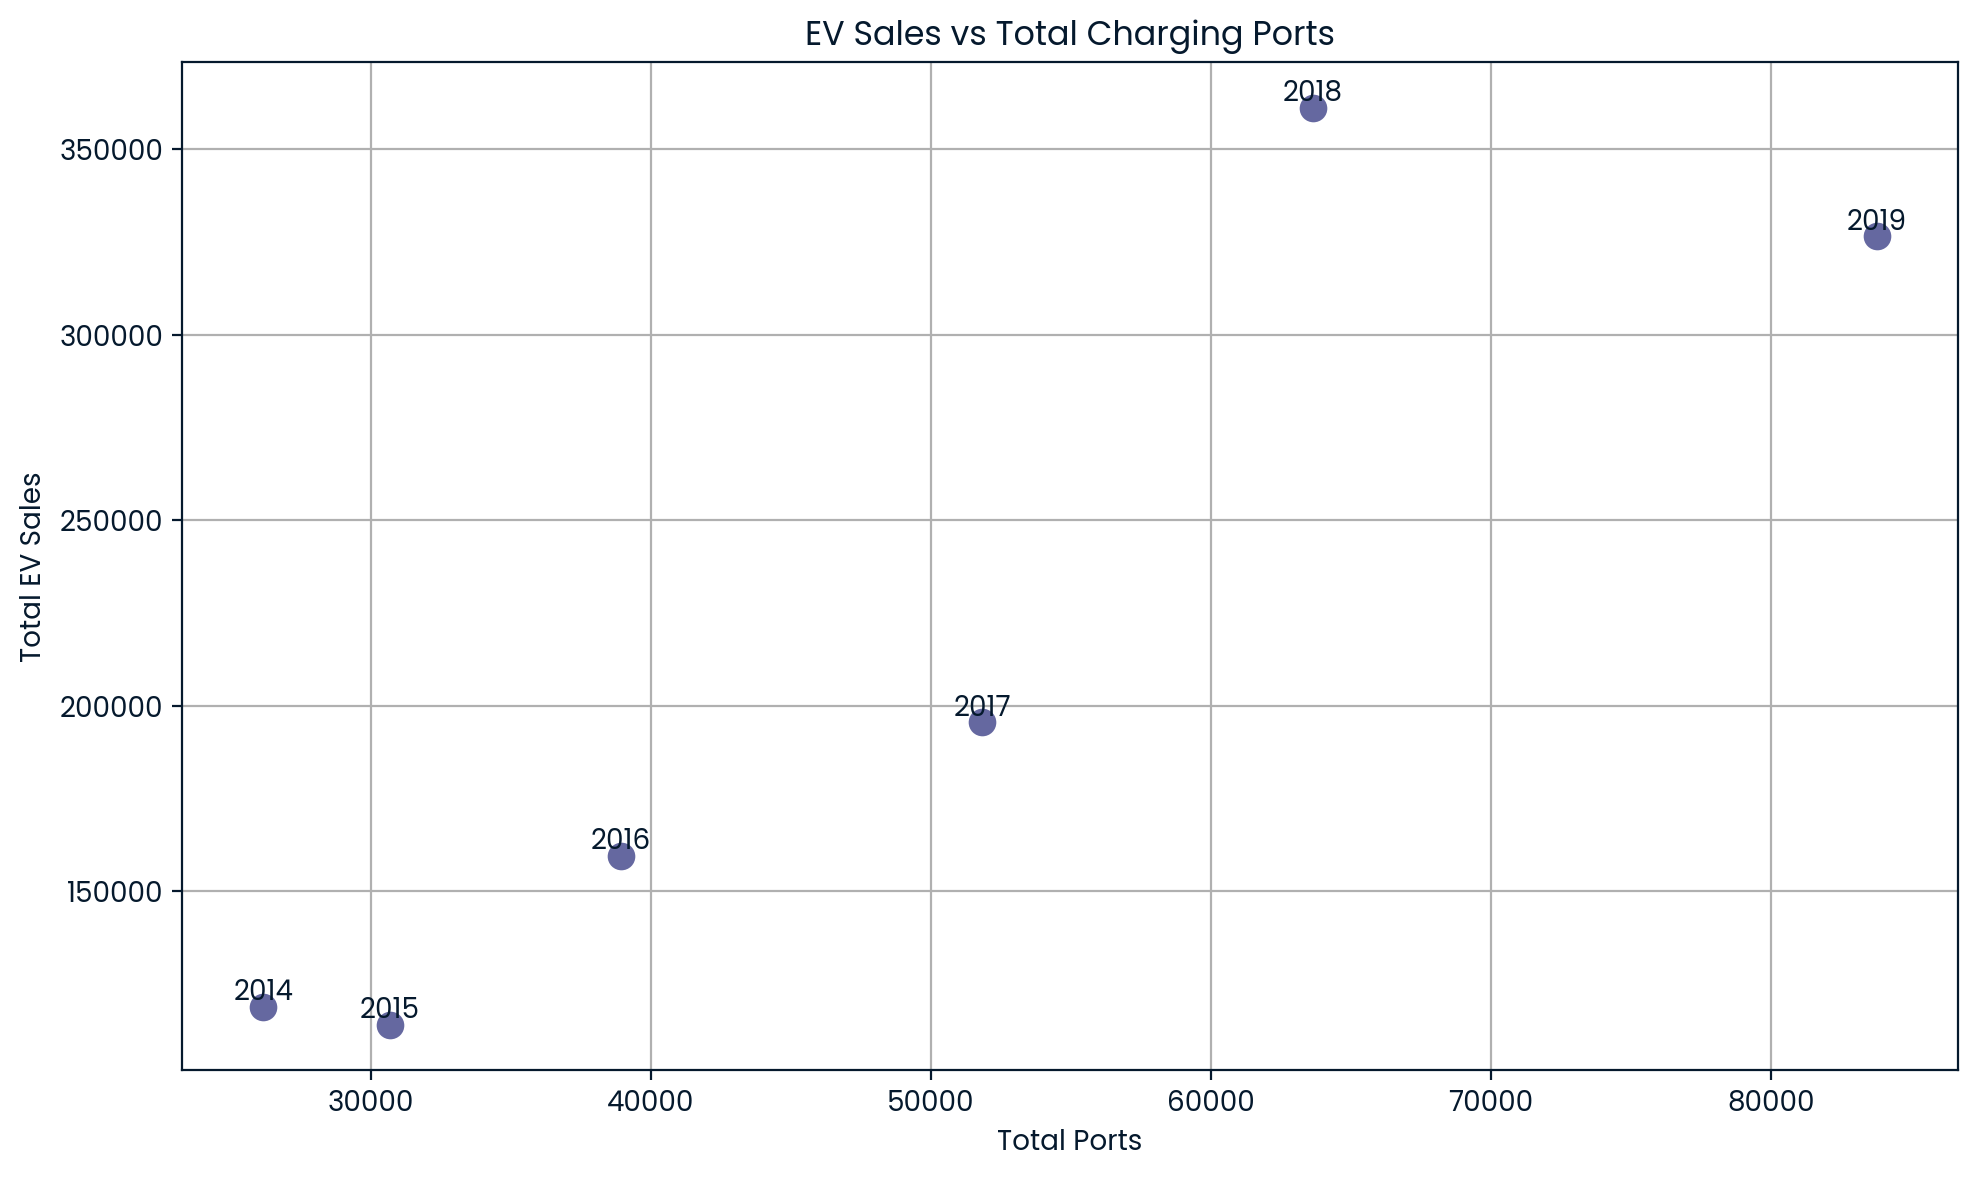

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(final_df["total_ports"], final_df["sales"], s=80)
# Optional year labels on points
for _, r in final_df.iterrows():
    if pd.notna(r["total_ports"]) and pd.notna(r["sales"]):
        plt.text(r["total_ports"], r["sales"], str(int(r["year"])), ha="center", va="bottom")
_finalize("EV Sales vs Total Charging Ports", "Total Ports", "Total EV Sales",
          save_as="figures_ev/sales_vs_ports_scatter.png", grid="both")

## Top 5 EV Models: yearly sales lines

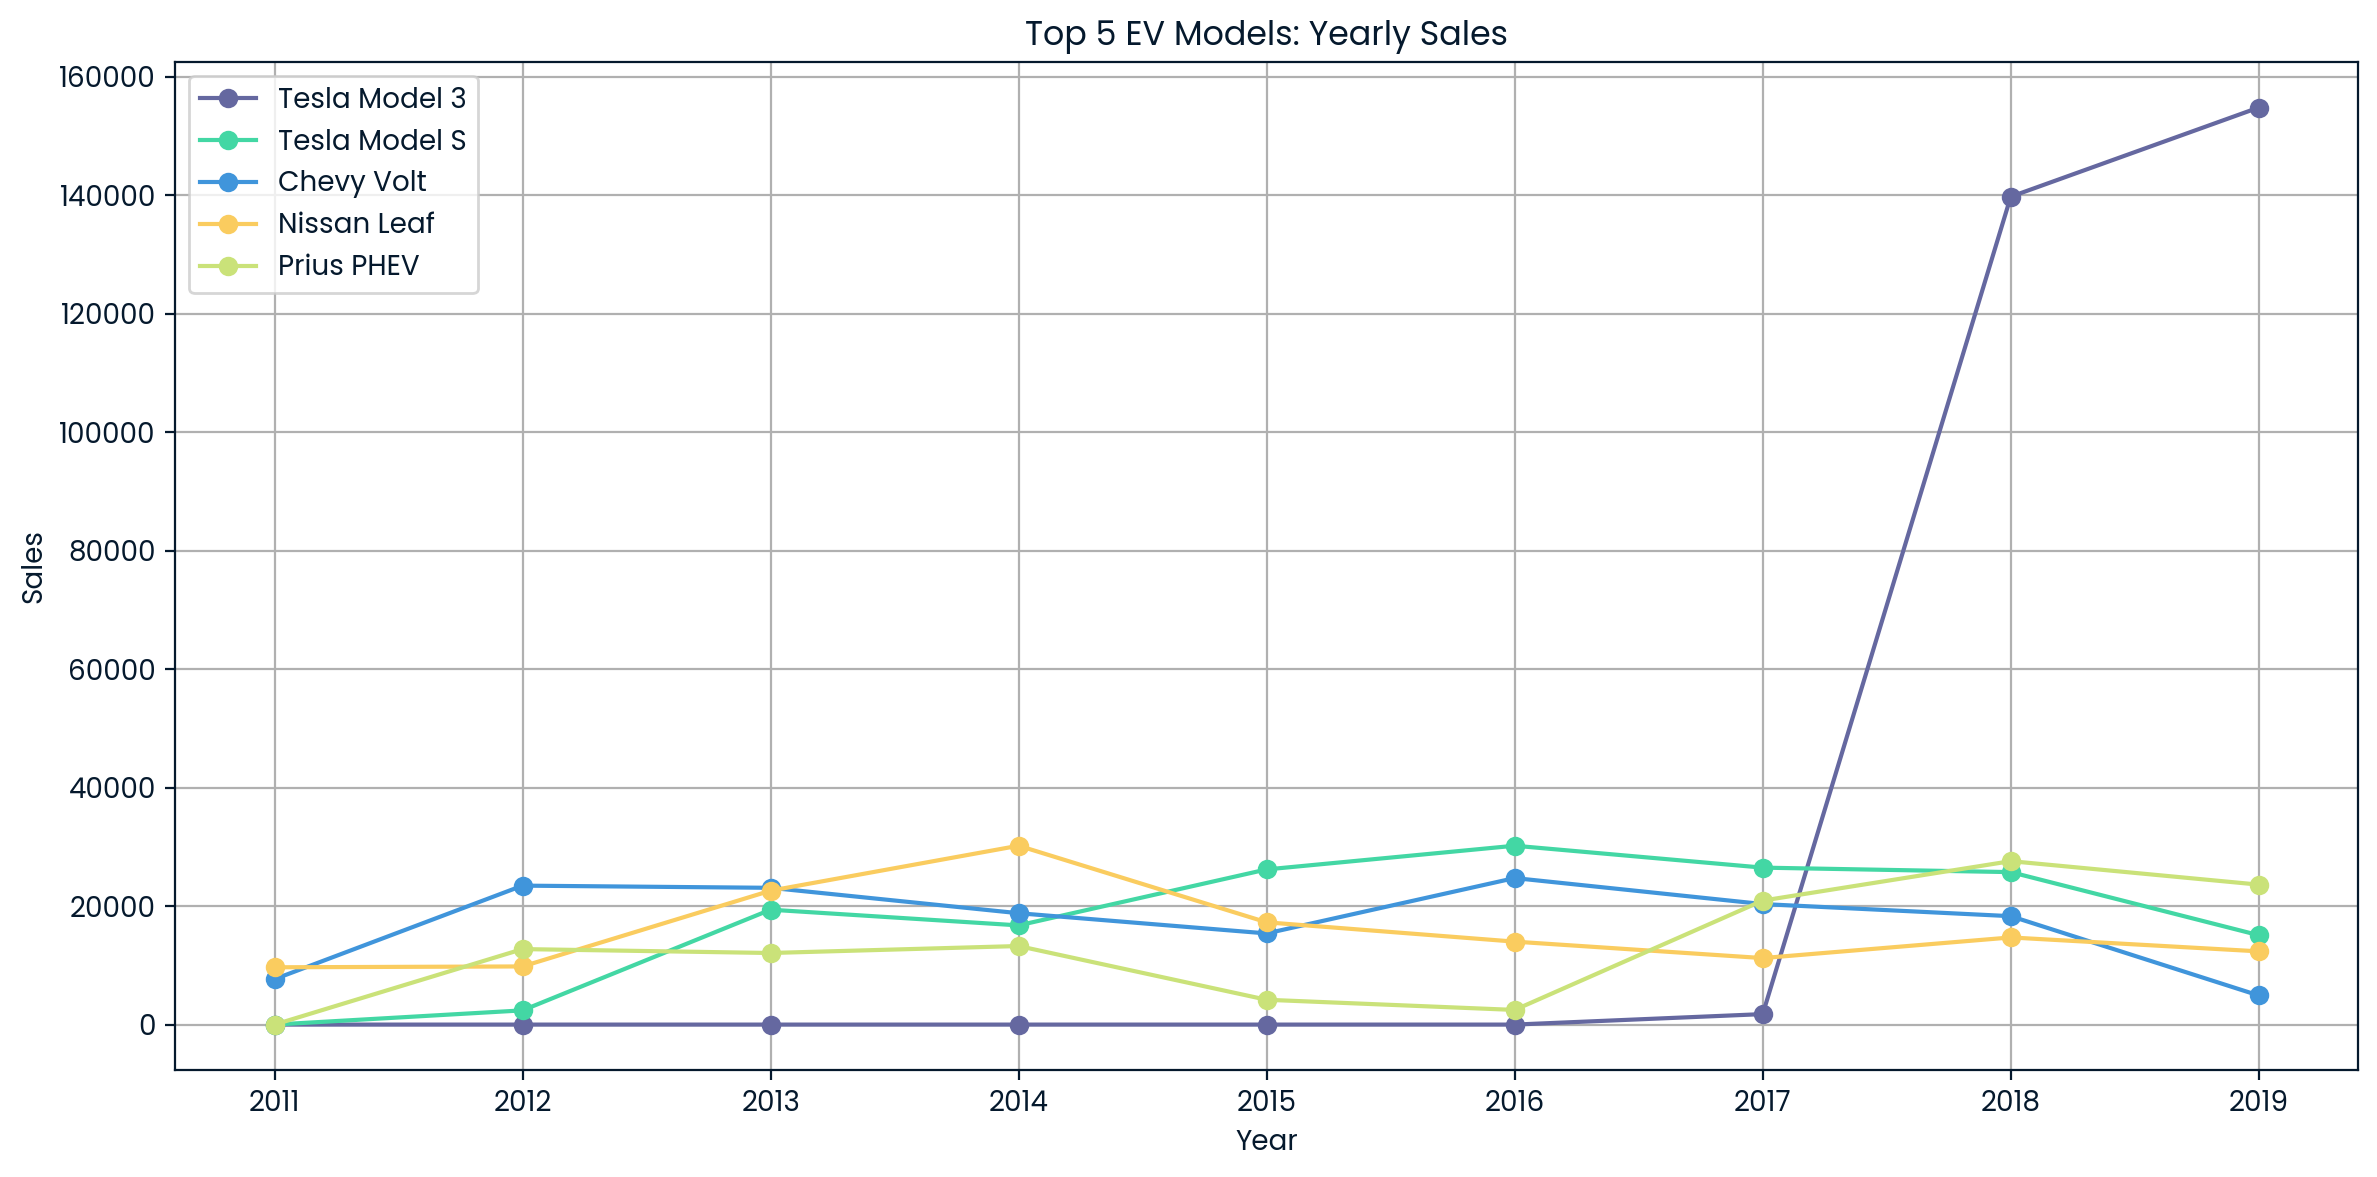

In [29]:
top_models = (ev_sales.groupby("vehicle")["sales"].sum()
              .sort_values(ascending=False).head(5).index.tolist())
models_df = (ev_sales[ev_sales["vehicle"].isin(top_models)]
             .groupby(["year","vehicle"], as_index=False)["sales"].sum()
             .sort_values(["vehicle","year"]))
plt.figure(figsize=(12, 6))
for m in top_models:
    sub = models_df[models_df["vehicle"] == m]
    plt.plot(sub["year"], sub["sales"], marker="o", label=m)
plt.legend()
_finalize("Top 5 EV Models: Yearly Sales", "Year", "Sales",
          save_as="figures_ev/top_5_models_yearly_sales.png", grid="both")